In [3]:
import numpy as np 
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv("song_data.csv")
df2 = pd.read_csv("song_info.csv")

df1.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
df2.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [7]:
print(df1.shape , df2.shape)

(18835, 15) (18835, 4)


In [8]:
# PRE PROCESSING 

In [9]:
# since both the data is useful for us , we merge the 2 seperate tables into 1 

In [10]:
# since both tables have a column named "song_name" we drop it from df2

# concatinating both 
df2 = df2.drop(["song_name"] , axis = 1)
df = pd.concat([df1 , df2] , axis=1)
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


In [11]:
df.shape

(18835, 18)

In [12]:
# saving our new dataset 

df.to_csv("our_dataset.csv")

In [13]:
# data analysis and feature engineering 

In [14]:
# encoding strings 
from sklearn.preprocessing import LabelEncoder

model = LabelEncoder()


df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


In [15]:
# adding the target ie: song_popularity towards the end just for convenience 

df = df.assign(column_name=df['song_popularity']).drop('song_popularity', axis=1)
df.rename(columns={'column_name': 'song_popularity'}, inplace=True)

df.head()

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,song_popularity
0,Boulevard of Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems,73
1,In The End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems,66
2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems,76
3,By The Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,74
4,How You Remind Me,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems,56


In [16]:
# checking if there is any missing values 

print(df.isnull().sum())

song_name           0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
artist_name         0
album_names         0
playlist            0
song_popularity     0
dtype: int64


In [17]:
# as we can see there is no null values and hence nothing is required 

In [18]:
# classification of popularity

'''

We need to classify the song's popularity at multiple degrees to do that we need
to decide on a threshold of what rating makes a song a super hit 
while what rating is average, below average, low, etc. 

'''

"\n\nWe need to classify the song's popularity at multiple degrees to do that we need\nto decide on a threshold of what rating makes a song a super hit \nwhile what rating is average, below average, low, etc. \n\n"

In [19]:
popularity = list(df['song_popularity'])
popularity.sort()
print(popularity)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [20]:
print(max(df['song_popularity']) , min(df['song_popularity']))

100 0


In [21]:
''' 
as we can see we have every type of popularity and hence we need to trynna find 
a distribution curve to know the distribution of the data -> distplot

'''

' \nas we can see we have every type of popularity and hence we need to trynna find \na distribution curve to know the distribution of the data -> distplot\n\n'

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


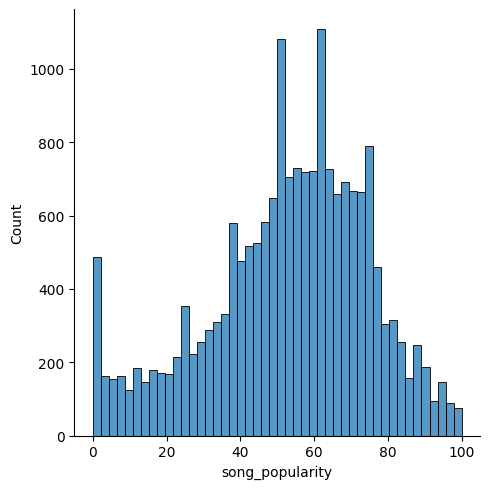

In [22]:
sns.displot(df["song_popularity"])
# plothist_median("song_popularity")


In [23]:
df["song_popularity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18835 entries, 0 to 18834
Series name: song_popularity
Non-Null Count  Dtype
--------------  -----
18835 non-null  int64
dtypes: int64(1)
memory usage: 147.3 KB


In [24]:
# let's view various percentile cutoffs using the describe function 
df["song_popularity"].describe(percentiles=[.05, .10, .25, .50, .75, .8, .90, .95])

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
5%           8.000000
10%         21.000000
25%         40.000000
50%         56.000000
75%         69.000000
80%         72.000000
90%         78.000000
95%         85.000000
max        100.000000
Name: song_popularity, dtype: float64

In [25]:
'''

We call the song with greater than equal 
90%ile<= as "potential masterpiece" --> 100 => 78-100
75-90%ile as "popular" --> 200 => 69-78
50-75%ile as "mildly popular" --> 300 => 56-69
50%ile> as "potential flop" --> 400 => 0-56


'''

'\n\nWe call the song with greater than equal \n90%ile<= as "potential masterpiece" --> 100 => 78-100\n75-90%ile as "popular" --> 200 => 69-78\n50-75%ile as "mildly popular" --> 300 => 56-69\n50%ile> as "potential flop" --> 400 => 0-56\n\n\n'

In [26]:
# percentage of songs that are potential masterpieces
print("percentage of songs that are potential masterpieces: ", len(df[df["song_popularity"]>=78])/len(df)*100)

#percentage of songs that are popular
print("percentage of songs that are popular: ", len(df[(df["song_popularity"]>=69) & (df["song_popularity"]<78)])/len(df)*100)


#percentage of songs that are mildly popular
print("#percentage of songs that are mildly popular: ", len(df[(df["song_popularity"]>=56) & (df["song_popularity"]<69)])/len(df)*100)

#percentage of songs that are potential flops
print("#percentage of songs that are potential flops: ", len(df[df["song_popularity"]<56])/len(df)*100)

percentage of songs that are potential masterpieces:  10.963631537032121
percentage of songs that are popular:  14.573931510485796
#percentage of songs that are mildly popular:  24.486328643482878
#percentage of songs that are potential flops:  49.9761083089992


So there is no imbalance in our data and the margins.

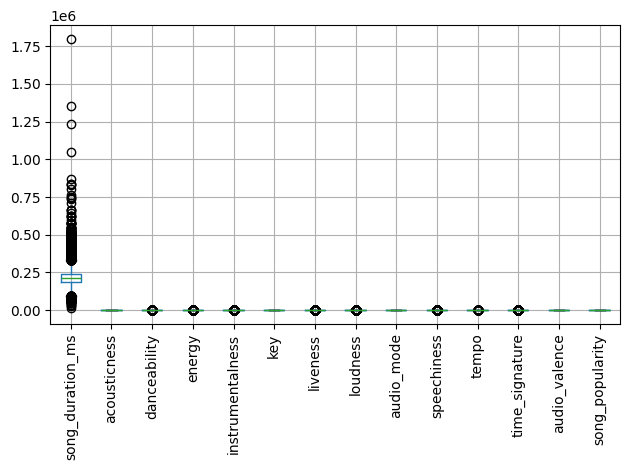

In [27]:
df.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()


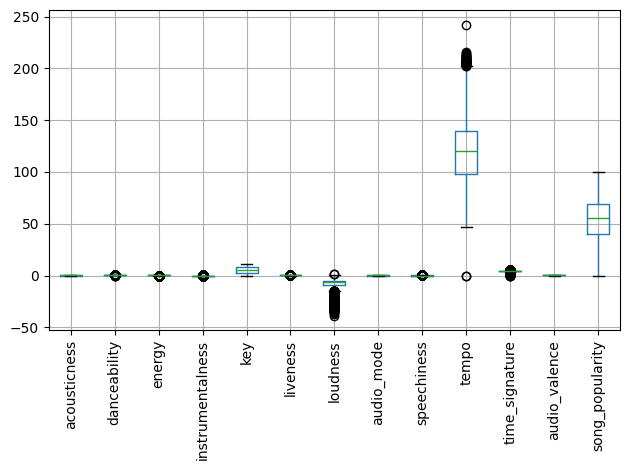

In [28]:
df.drop('song_duration_ms', axis = 1).boxplot()
plt.xticks(rotation = 90)

plt.tight_layout()

In [29]:
df['key']

0         8
1         3
2         0
3         0
4        10
         ..
18830    11
18831    11
18832     0
18833     3
18834     4
Name: key, Length: 18835, dtype: int64

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


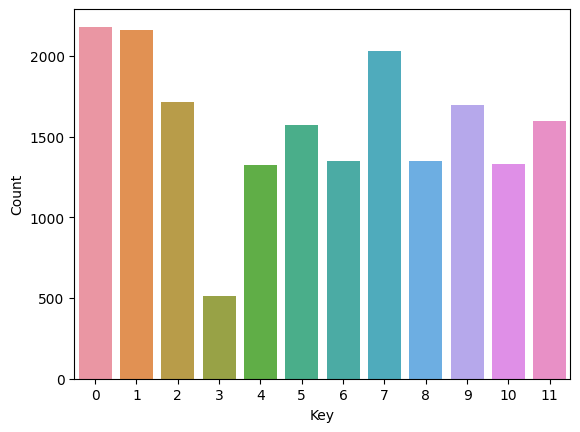

In [30]:
# plot countplot of key
sns.countplot(x=df['key'])
plt.ylabel("Count")
plt.xlabel("Key")
# plt.grid(True)
plt.show()

# plt.xticks(rotation = 90)
# plt.tight_layout()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
 14  artist_name       18835 non-null  object 
 15  album_names       18835 non-null  object 
 16  playlist          18835 non-null  object

In [32]:
df['audio_mode'].value_counts()

audio_mode
1    11831
0     7004
Name: count, dtype: int64

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


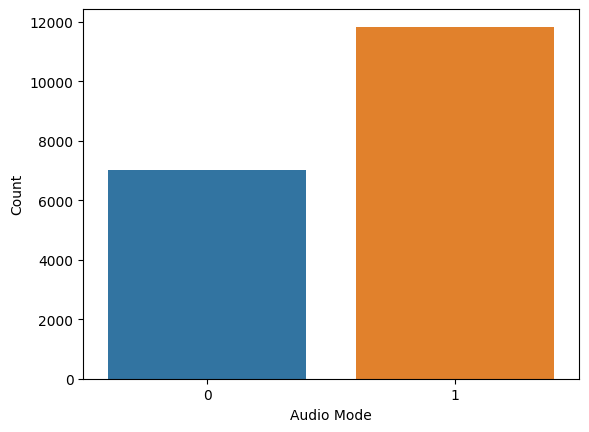

In [33]:
sns.countplot(x=df['audio_mode'])
plt.ylabel("Count")
plt.xlabel("Audio Mode")

plt.show()

In [34]:
df['time_signature'].value_counts()

time_signature
4    17754
3      772
5      233
1       73
0        3
Name: count, dtype: int64

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


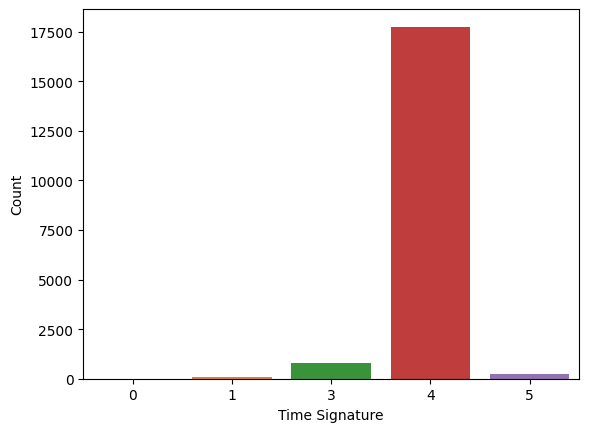

In [35]:
sns.countplot(x=df['time_signature'])
plt.ylabel("Count")
plt.xlabel("Time Signature")

plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
 14  artist_name       18835 non-null  object 
 15  album_names       18835 non-null  object 
 16  playlist          18835 non-null  object

In [37]:
def plothist_median(column_name : str, y_res : int = 0):
    # Assuming you have a DataFrame named df and you want to plot a specific column
    # column_name = 'song_duration_ms'/

    # Create a histogram plot
    ax = sns.histplot(x=df[column_name])

    # Calculate the median and mean of the data
    median_value = df[column_name].median()
    mean_value = df[column_name].mean()

    # Add vertical lines for the median and mean
    ax.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
    ax.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')

    if(y_res):
        plt.ylim(0, y_res)

    # Add labels and legend
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot
    plt.show()



/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


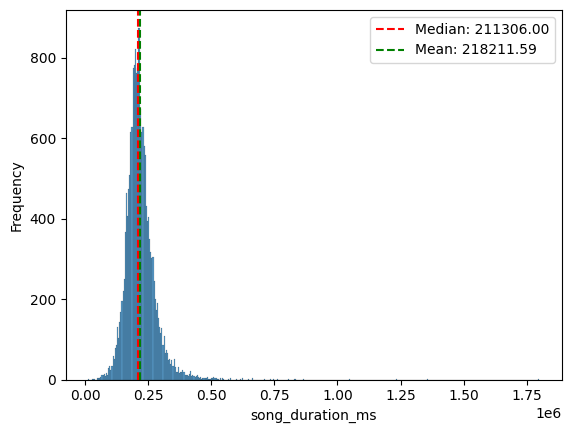

In [38]:
plothist_median("song_duration_ms")


/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


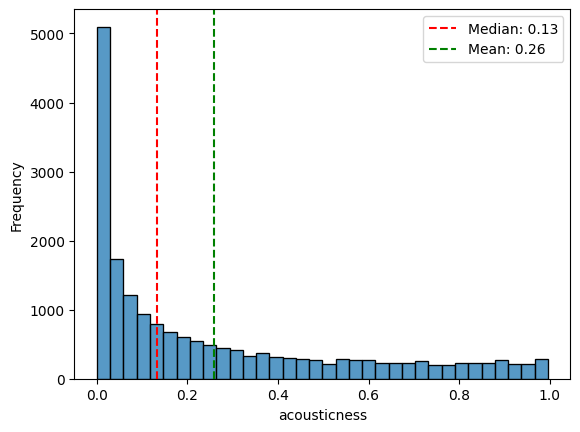

In [39]:
# sns.histplot(x = df['acousticness'])
plothist_median("acousticness")

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


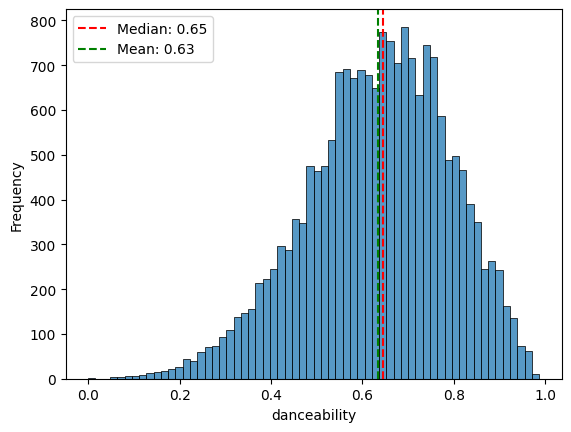

In [40]:
# sns.histplot(x = df['danceability'])
plothist_median("danceability")

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


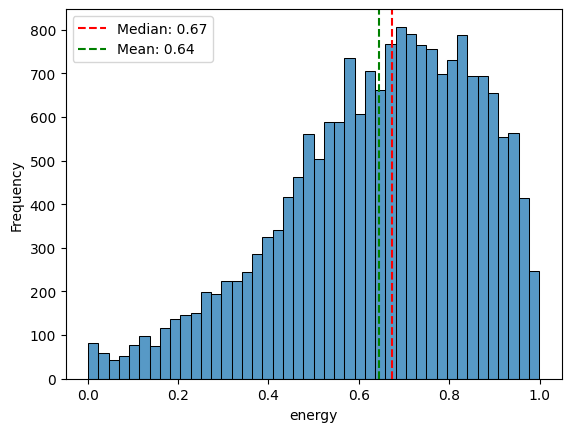

In [41]:
# sns.histplot(x = df['energy'])
plothist_median("energy")

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 300.0)

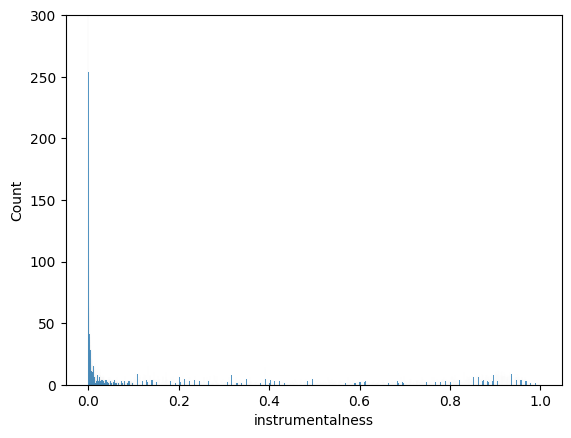

In [42]:
sns.histplot(x = df['instrumentalness'])
# plothist_median("instrumentalness",300)
# # restrict y axis to 500
plt.ylim(0, 300)

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


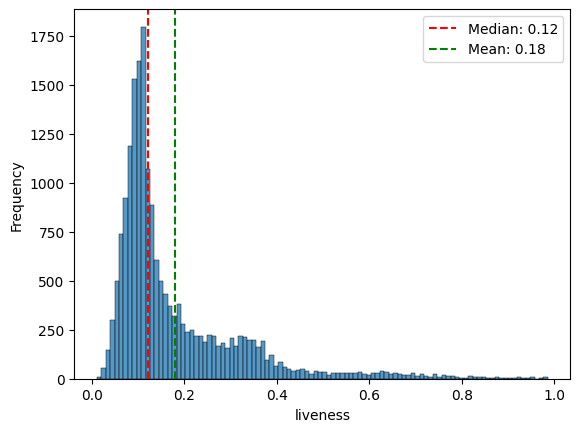

In [43]:
# sns.histplot(x = df['liveness'])
plothist_median("liveness")


/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


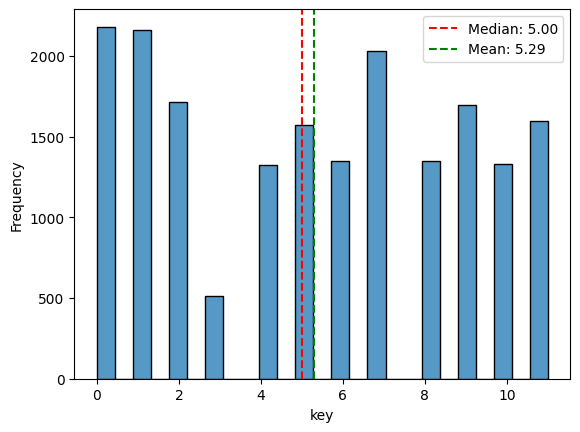

In [44]:
# sns.histplot(x = df['key'])
plothist_median("key")


/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


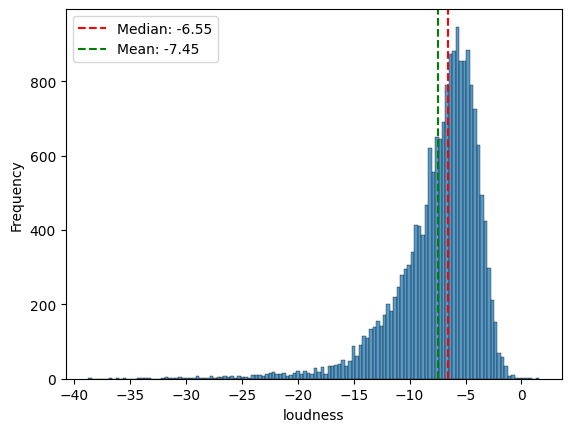

In [45]:
# sns.histplot(x = df['loudness'])
plothist_median("loudness")

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


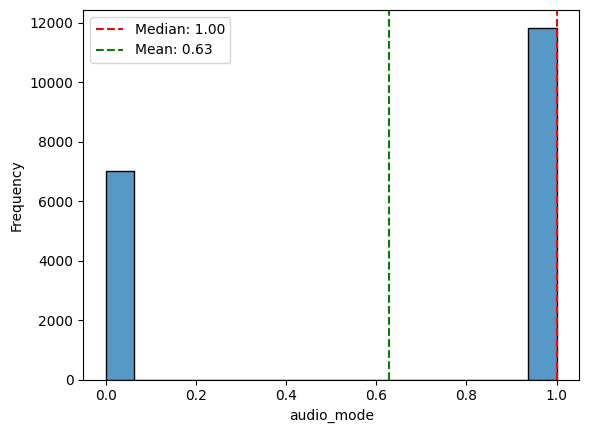

In [46]:
# sns.histplot(x = df['audio_mode'])
plothist_median("audio_mode")

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


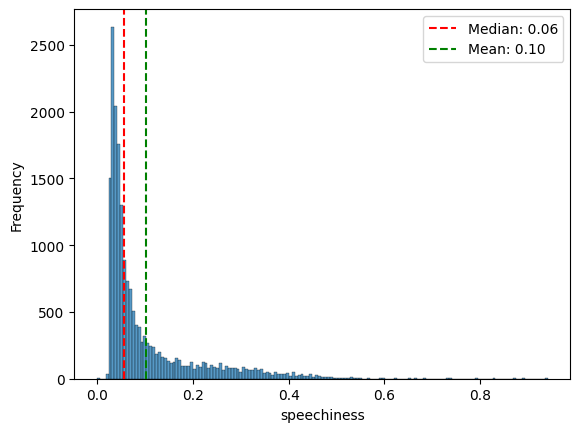

In [47]:
# sns.histplot(x = df['speechiness'])
plothist_median("speechiness")

/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


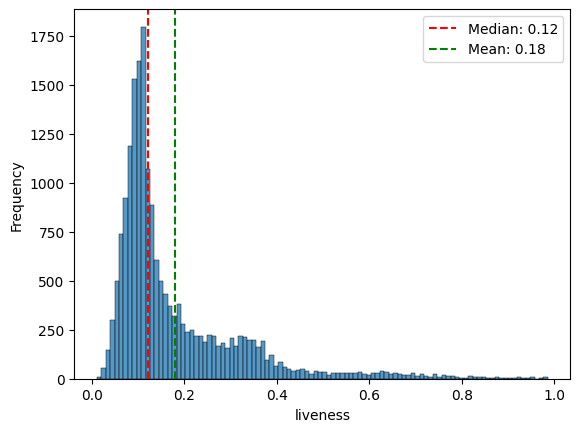

In [48]:
# sns.histplot(x = df['time_signature'])  
plothist_median("liveness")


/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/manav/siegebreaker/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


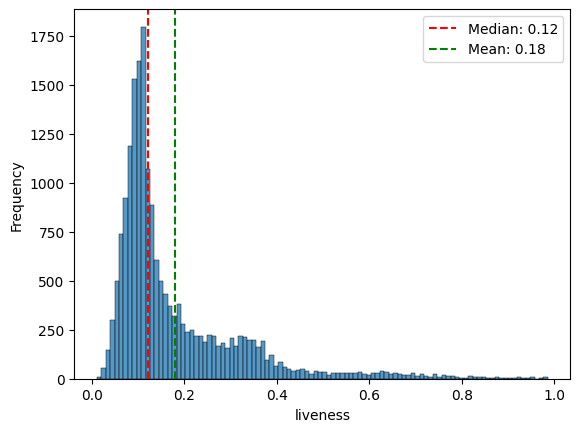

In [49]:
# sns.histplot(x = df['audio_valence'])
plothist_median("liveness")


<Axes: >

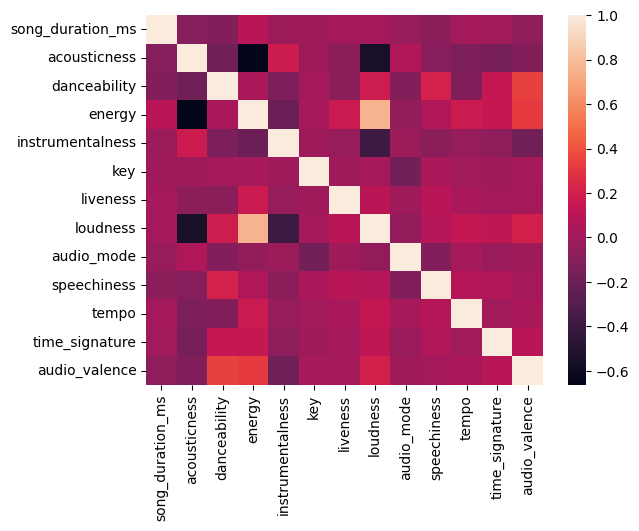

In [50]:
# df.corr()
df_numerical = df.drop(columns=['song_name', 'artist_name', 'album_names', 'playlist', 'song_popularity'])
sns.heatmap(df_numerical.corr())

In [51]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

columns=['song_name', 'artist_name', 'album_names', 'playlist']
for col in columns:
    print(col)
    # Assuming you have a DataFrame named df with a column named 'text'
    text_data = df[col].str.cat(sep=' ')  # Concatenate all text data into a single string

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Plot the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis labels
    plt.show()


ModuleNotFoundError: No module named 'wordcloud'